<a href="https://colab.research.google.com/github/Deendayal6265/GRIP-The-Spark-Foundation-intern/blob/main/Task%204/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**GRIP: The Spark Foundation**

#**Task 4:- Exploratory Data Analysis - Terrorism**

Problem Statement: Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’

As a security/defense analyst, try to find out the hot zone of terrorism.

What all security issues and insights you can derive by EDA?



In [1]:
#import all the required libraries. 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import folium
from folium.plugins import MarkerCluster

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Task 4 dataset.csv",encoding='latin1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [7]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [9]:
df.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999996,0.002706,0.018336,0.091761,-0.135039,0.401371,0.166886,0.003907,0.030641,0.070646,0.002019,0.026215,-0.016789,0.298888,0.041344,0.093720,-0.082972,0.137743,0.074173,0.071982,0.189245,0.079080,0.048798,-0.019084,0.097623,0.111425,-0.082822,0.156170,0.090551,0.039081,0.040647,-0.066449,-0.177867,0.017939,-0.137408,0.428397,0.141600,0.110578,0.033917,0.038996,-0.318032,-0.146094,0.398728,-0.011716,0.101733,0.101045,0.041027,0.081357,0.090000,-0.138596,0.027110,0.015351,-0.013808,0.027579,0.015282,-0.029348,0.027904,-0.278927,-0.150677,-0.013498,-0.010146,0.006369,-0.010082,-0.493414,-0.169859,-0.241986,-0.009990,-0.018001,-0.014094,-0.165422,0.256113,-0.181612,-0.143600,-0.133252,-0.077852,-0.175605
iyear,0.999996,1.000000,0.000139,0.018254,0.091754,-0.135023,0.401384,0.166933,0.003917,0.030626,0.070659,0.001995,0.026211,-0.016784,0.298920,0.041367,0.093736,-0.082963,0.137736,0.074153,0.072177,0.189454,0.079082,0.048794,-0.019068,0.097552,0.111364,-0.082784,0.155939,0.090345,0.038941,0.040656,-0.066417,-0.177591,0.017944,-0.137459,0.428278,0.141486,0.110542,0.034143,0.039172,-0.318815,-0.145529,0.398227,-0.011737,0.101727,0.101036,0.040990,0.081342,0.090267,-0.138298,0.026855,0.015341,-0.013828,0.027563,0.015273,-0.029357,0.027879,-0.278916,-0.150690,-0.013490,-0.010159,0.006342,-0.010093,-0.493378,-0.169931,-0.241764,-0.009984,-0.018216,-0.014238,-0.165375,0.256092,-0.181556,-0.143601,-0.133253,-0.077847,-0.175596
imonth,0.002706,0.000139,1.000000,0.005497,-0.000468,-0.006305,-0.002999,-0.015978,-0.003880,0.003621,-0.004501,0.001568,0.001734,0.000176,-0.012477,-0.011762,-0.004422,-0.002845,0.003071,0.006705,-0.029027,-0.039298,-0.000948,0.001508,-0.004838,0.019584,0.016365,-0.006315,0.059489,0.052698,0.036580,-0.004460,-0.008286,-0.054490,-0.001661,0.014354,0.019890,0.023083,0.013361,-0.040736,-0.040042,0.147710,-0.156620,0.144738,0.007863,0.002142,0.000581,0.009567,-0.020514,-0.086445,-0.062079,0.058090,0.003463,0.003891,0.003462,0.002938,0.001467,0.005091,-0.005816,0.001027,-0.003279,0.003397,0.011226,0.003746,-0.015730,0.002131,-0.070199,-0.000710,0.046989,0.058878,-0.016597,0.011295,-0.011535,-0.002302,-0.002034,-0.002554,-0.006336
iday,0.018336,0.018254,0.005497,1.000000,-0.004700,0.003468,0.009710,0.003423,-0.002285,-0.006991,-0.005367,0.011434,-0.002702,-0.004889,0.002395,-0.007817,-0.000395,-0.011802,0.003593,-0.005333,0.014498,-0.080422,-0.000052,-0.003184,0.003845,0.008964,0.011289,-0.017420,-0.056251,-0.044442,-0.018528,-0.002186,0.041395,-0.039794,-0.003788,-0.013527,0.003300,0.004474,0.003635,-0.031937,0.029723,0.149860,0.106259,0.029735,-0.003019,0.006182,0.017279,-0.005912,0.043226,-0.000417,-0.005110,0.073744,-0.003693,-0.001987,-0.002012,-0.001268,0.001392,0.001812,-0.003903,-0.012729,-0.001093,0.004077,-0.020800,-0.002318,-0.036193,0.019856,0.001206,0.012755,-0.010502,0.003148,-0.006581,-0.006706,0.001765,-0.001540,-0.001621,-0.002027,-0.001199
extended,0.091761,0.091754,-0.000468,-0.004700,1.000000,-0.020466,0.038389,-0.024749,0.000523,0.057897,0.017784,-0.015029,0.001249,0.048533,0.011638,0.096563,-0.013440,0.073233,-0.033961,0.272272,-0.035143,-0.040606,0.011613,0.022996,0.013609,-0.031271,-0.014091,0.040233,0.032853,0.035114,0.014293,0.033464,-0.056545,-0.030

In [10]:
df.columns


Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

#**US Terror Attacks and Death Injuries.**

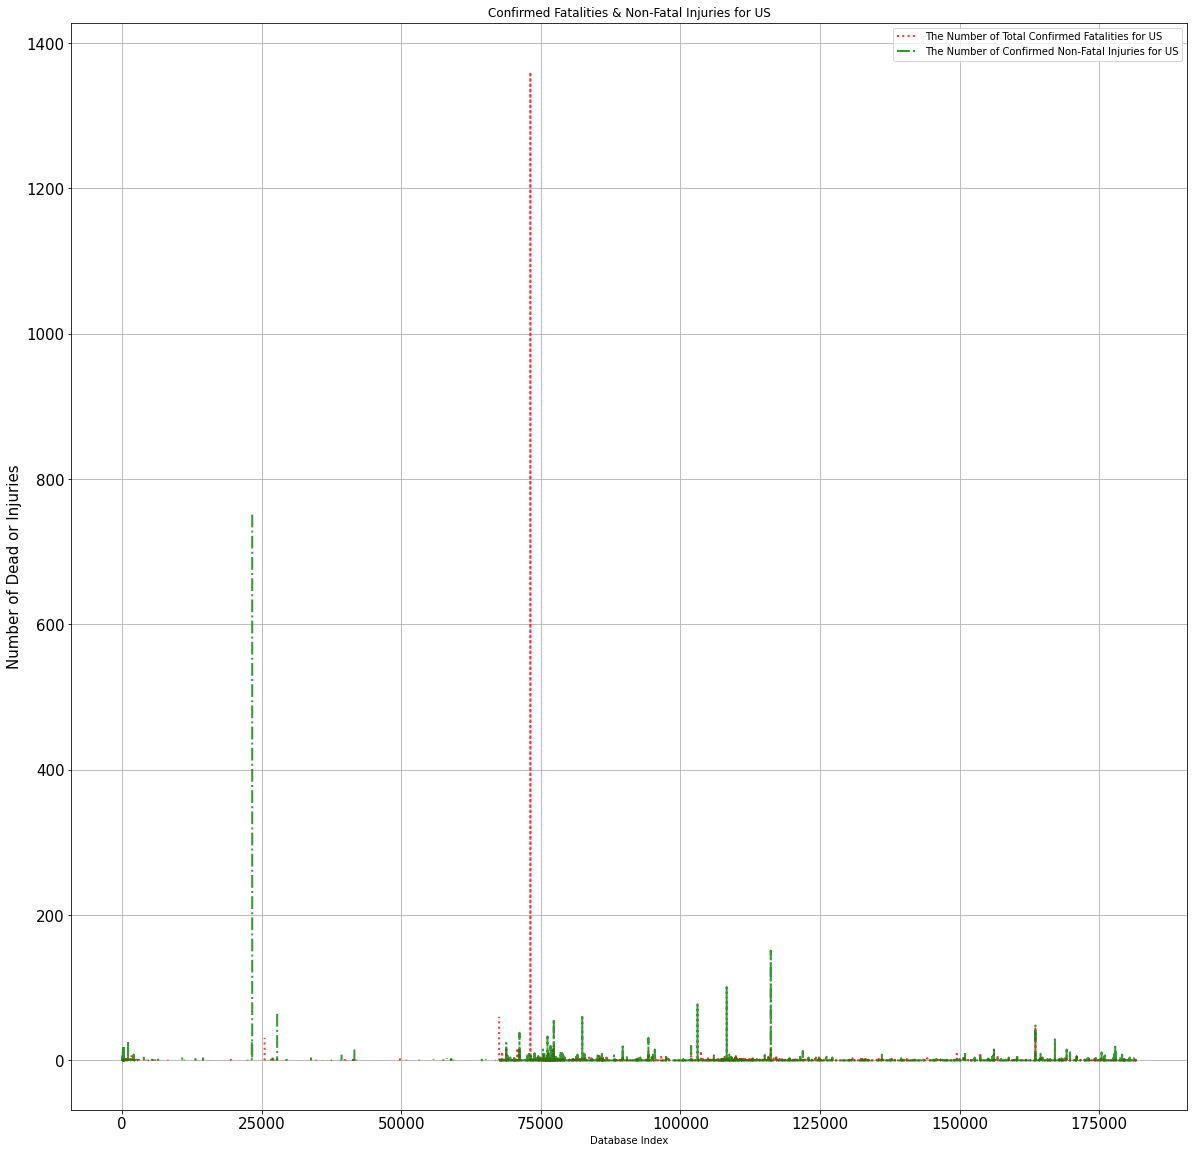

In [11]:
df.nkillus.plot(kind = 'line', color = 'red', label = 'The Number of Total Confirmed Fatalities for US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = ':', figsize = (20,20), fontsize=15)
df.nwoundus.plot(color = "green", label = 'The Number of Confirmed Non-Fatal Injuries for US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = '-.', figsize = (20,20), fontsize=15)

plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('Database Index', fontsize=10)              # label = name of label
plt.ylabel('Number of Dead or Injuries', fontsize=15)

plt.title('Confirmed Fatalities & Non-Fatal Injuries for US')            #plot title
plt.show()


# **Death and Injuries at all time.**

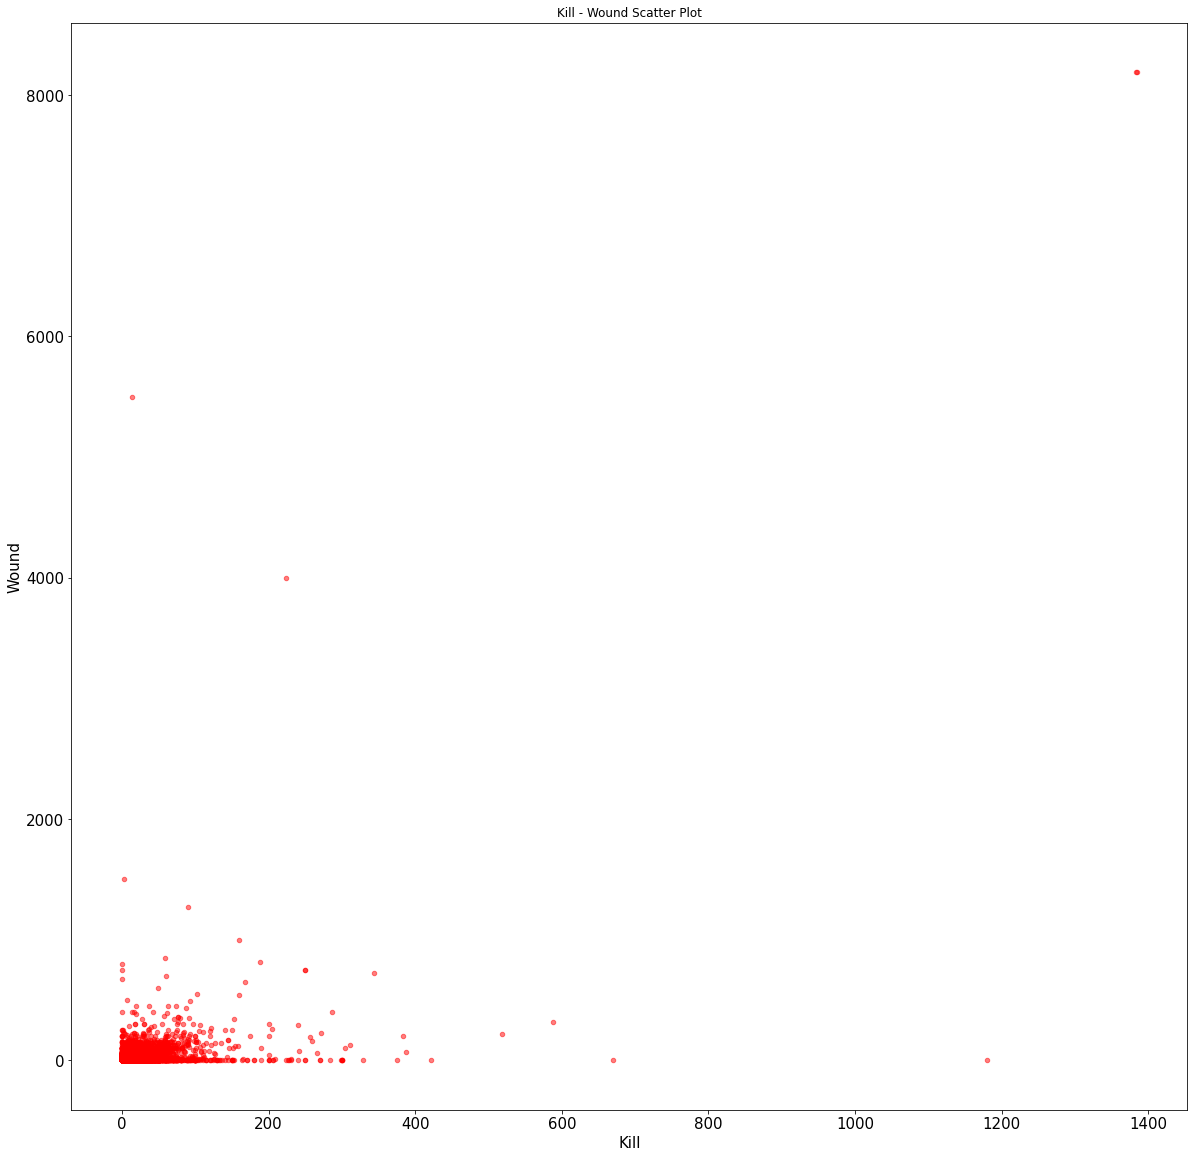

In [12]:
df.plot(kind = 'scatter', x = 'nkill', y = 'nwound', alpha = 0.5, color = 'red', figsize = (20,20), fontsize=15)
plt.xlabel('Kill', fontsize=15)
plt.ylabel('Wound', fontsize=15)
plt.title('Kill - Wound Scatter Plot')
plt.show()

# **Frequency of Terrorist Actions in Customized Region**
#Let's analyze in Middle East and North Africa

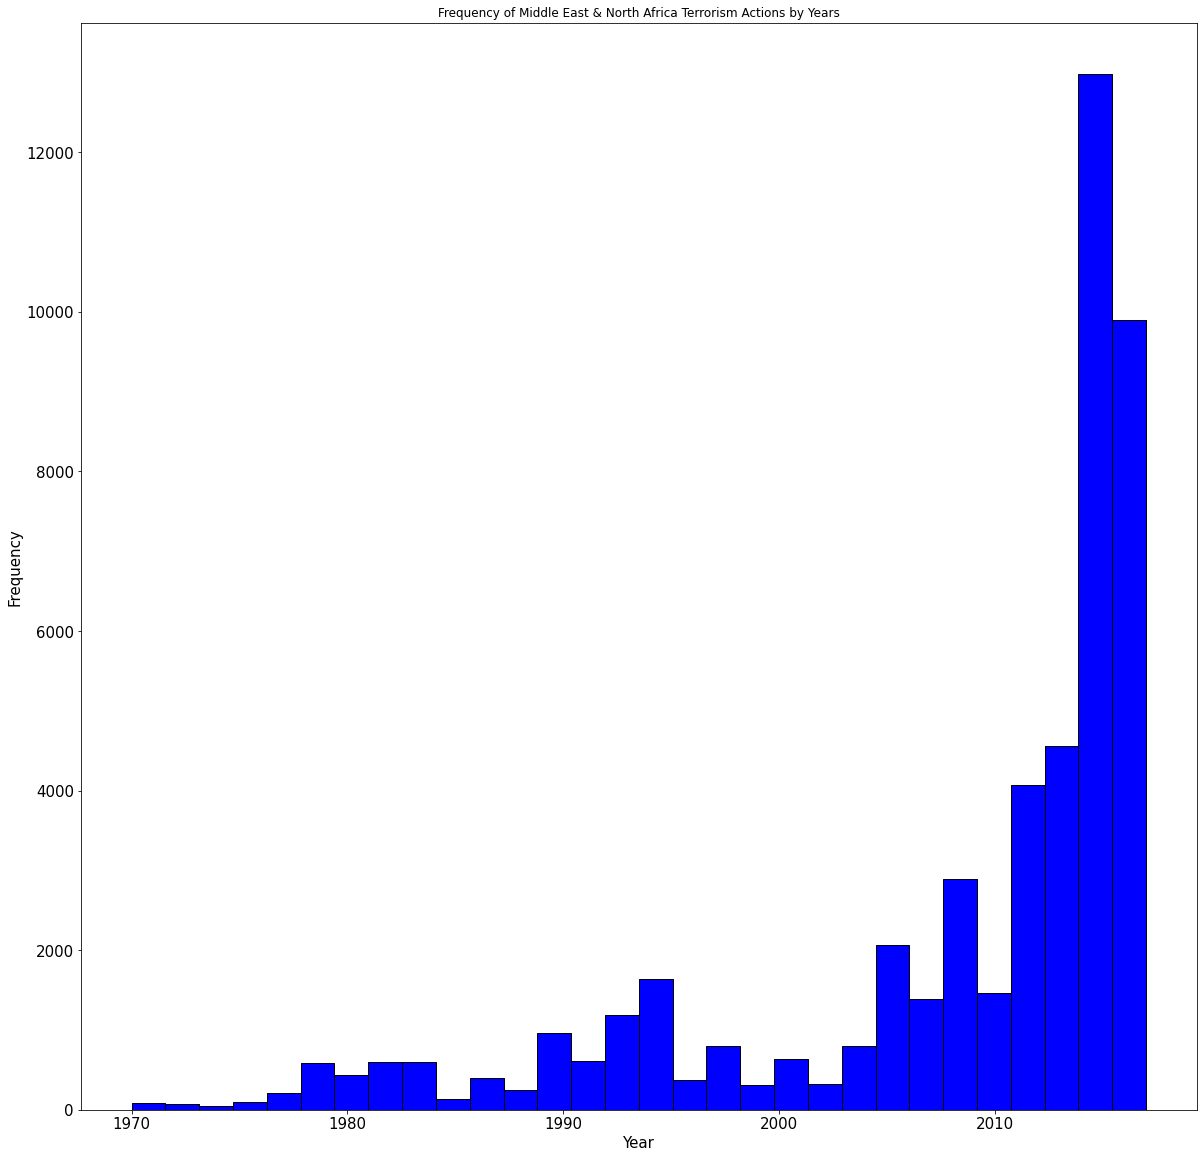

In [15]:
middleEastData = df[df['region'] == 10]
middleEastData.iyear.plot(kind = 'hist', bins = 30, figsize = (20,20),edgecolor="black", color = 'blue', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Frequency of Middle East & North Africa Terrorism Actions by Years')
plt.show()

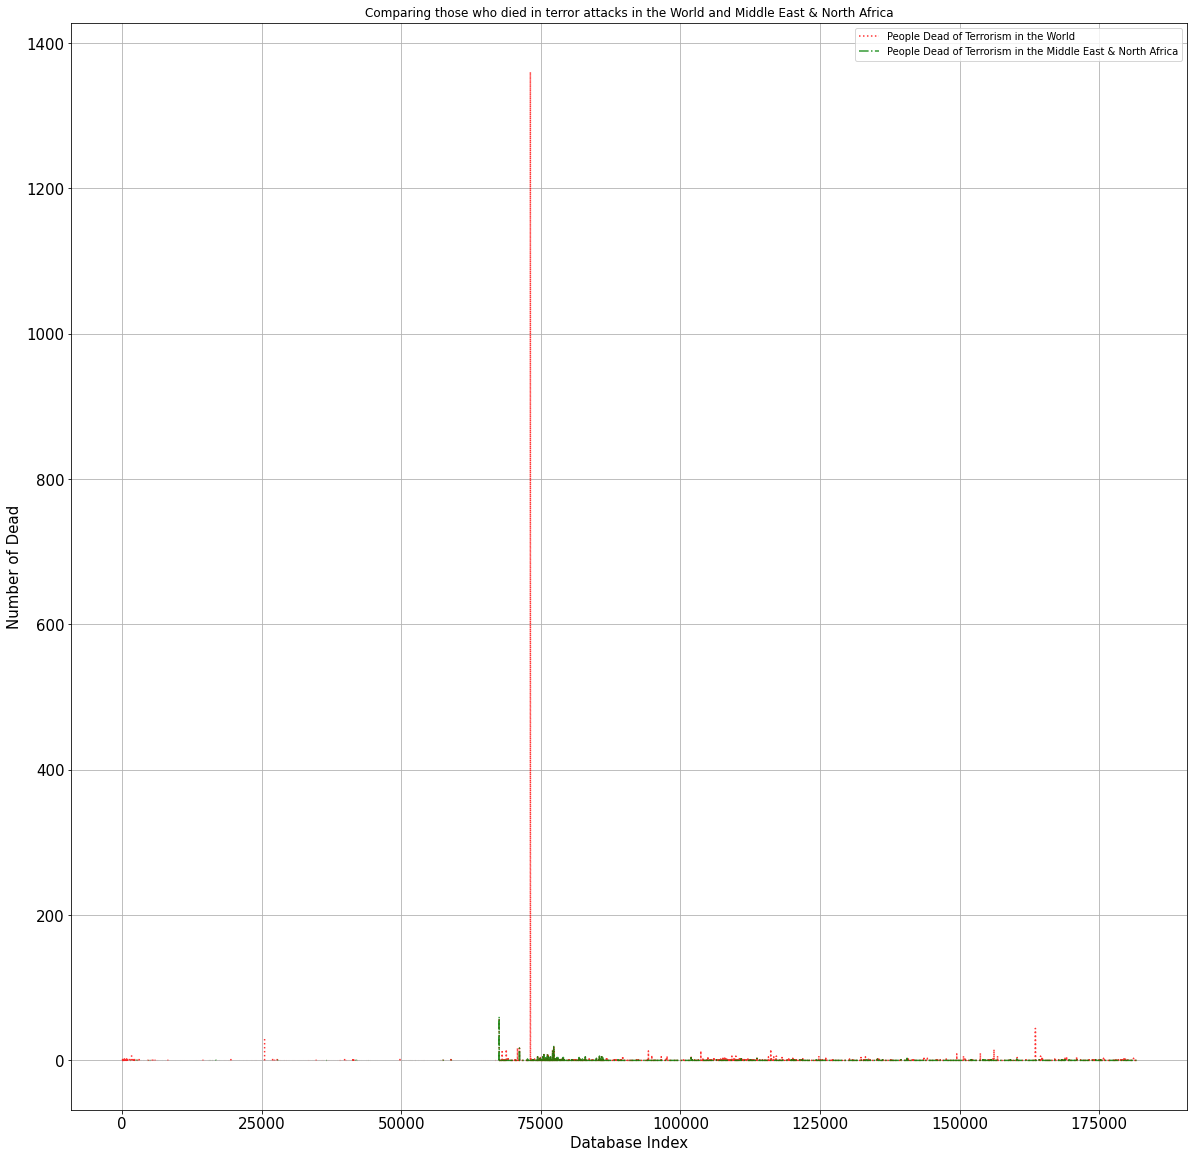

In [16]:
df.nkillus.plot(kind = 'line', color = 'red', label = 'People Dead of Terrorism in the World', linewidth = 1.5, alpha = 0.8, grid = True, 
                 linestyle = ':', figsize = (20,20), fontsize=15)
middleEastData.nkillus.plot(color = "green", label = 'People Dead of Terrorism in the Middle East & North Africa', linewidth = 1.5, alpha = 0.8, 
                            grid = True, linestyle = '-.', figsize = (20,20), fontsize=15)

plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('Database Index', fontsize=15)              # label = name of label
plt.ylabel('Number of Dead', fontsize=15)

plt.title('Comparing those who died in terror attacks in the World and Middle East & North Africa')            #plot title
plt.show()

#Terrorist Attacks of a Particular year and their Locations.
Let's look at the terrorist acts in the world over a certain year.

In [17]:
filterYear = df['iyear'] == 1970

In [18]:
filterData = df[filterYear] # filter data
# filterData.info()
reqFilterData = filterData.loc[:,'city':'longitude'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()
# reqFilterDataList

In [19]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]], popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

#Total Number of people killed in terror attack

In [21]:
killData = df.loc[:,'nkill']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))

Number of people killed by terror attack: 411868


#Let's look at what types of attacks these deaths were made of.

In [22]:
attackData = df.loc[:,'attacktype1':'attacktype1_txt']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)

In [23]:
typeKillFormatData = typeKillData.pivot_table(columns='attacktype1_txt', values='nkill', aggfunc='sum')
typeKillFormatData

attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
nkill,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


In [24]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, nkill to nkill
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Armed Assault                        1 non-null      float64
 1   Assassination                        1 non-null      float64
 2   Bombing/Explosion                    1 non-null      float64
 3   Facility/Infrastructure Attack       1 non-null      float64
 4   Hijacking                            1 non-null      float64
 5   Hostage Taking (Barricade Incident)  1 non-null      float64
 6   Hostage Taking (Kidnapping)          1 non-null      float64
 7   Unarmed Assault                      1 non-null      float64
 8   Unknown                              1 non-null      float64
dtypes: float64(9)
memory usage: 80.0+ bytes


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


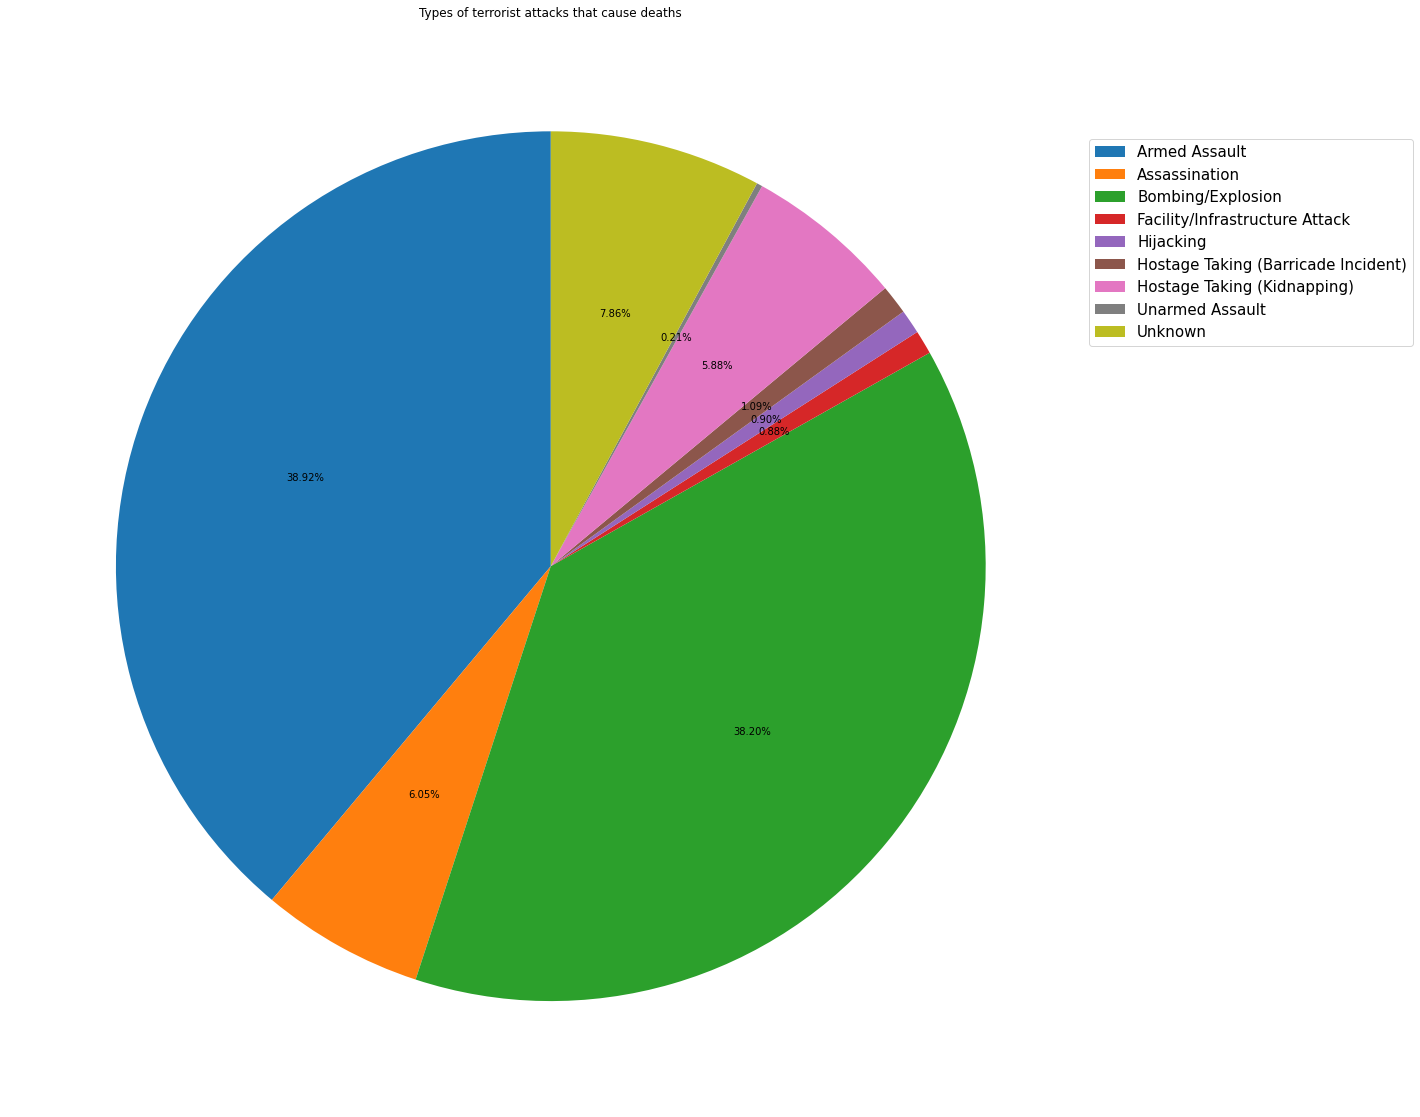

In [25]:
labels = typeKillFormatData.columns.tolist() # convert line to list
transpoze = typeKillFormatData.T # transpoze
values = transpoze.values.tolist()
fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=90, autopct='%.2f%%')
plt.title('Types of terrorist attacks that cause deaths')
plt.legend(labels, loc='upper right', bbox_to_anchor = (1.3, 0.9), fontsize=15) # location legend
plt.show()

#Number of Killed in Terrorist Attacks by Countries.

In [26]:
countryData = df.loc[:,'country':'country_txt']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

In [27]:
countryKillFormatData = countryKillData.pivot_table(columns='country_txt', values='nkill', aggfunc='sum')
countryKillFormatData

country_txt,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia-Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Costa Rica,Croatia,Cuba,...,Soviet Union,Spain,Sri Lanka,St. Kitts and Nevis,St. Lucia,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Vatican City,Venezuela,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
nkill,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,258.0,1.0,44.0,1244.0,76.0,14.0,79.0,3.0,0.0,9.0,42.0,79.0,11.0,203.0,0.0,28.0,134.0,4205.0,543.0,2347.0,365.0,1990.0,1119.0,228.0,1008.0,14698.0,1.0,17.0,248.0,8.0,...,96.0,1288.0,15530.0,0.0,2.0,3883.0,29.0,6.0,22.0,74.0,15229.0,60.0,307.0,73.0,2742.0,76.0,6.0,351.0,6888.0,3.0,3065.0,2261.0,123.0,3410.0,3771.0,6.0,68.0,0.0,0.0,227.0,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0


In [28]:
countryKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, nkill to nkill
Columns: 205 entries, Afghanistan to Zimbabwe
dtypes: float64(205)
memory usage: 1.6+ KB


In [29]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

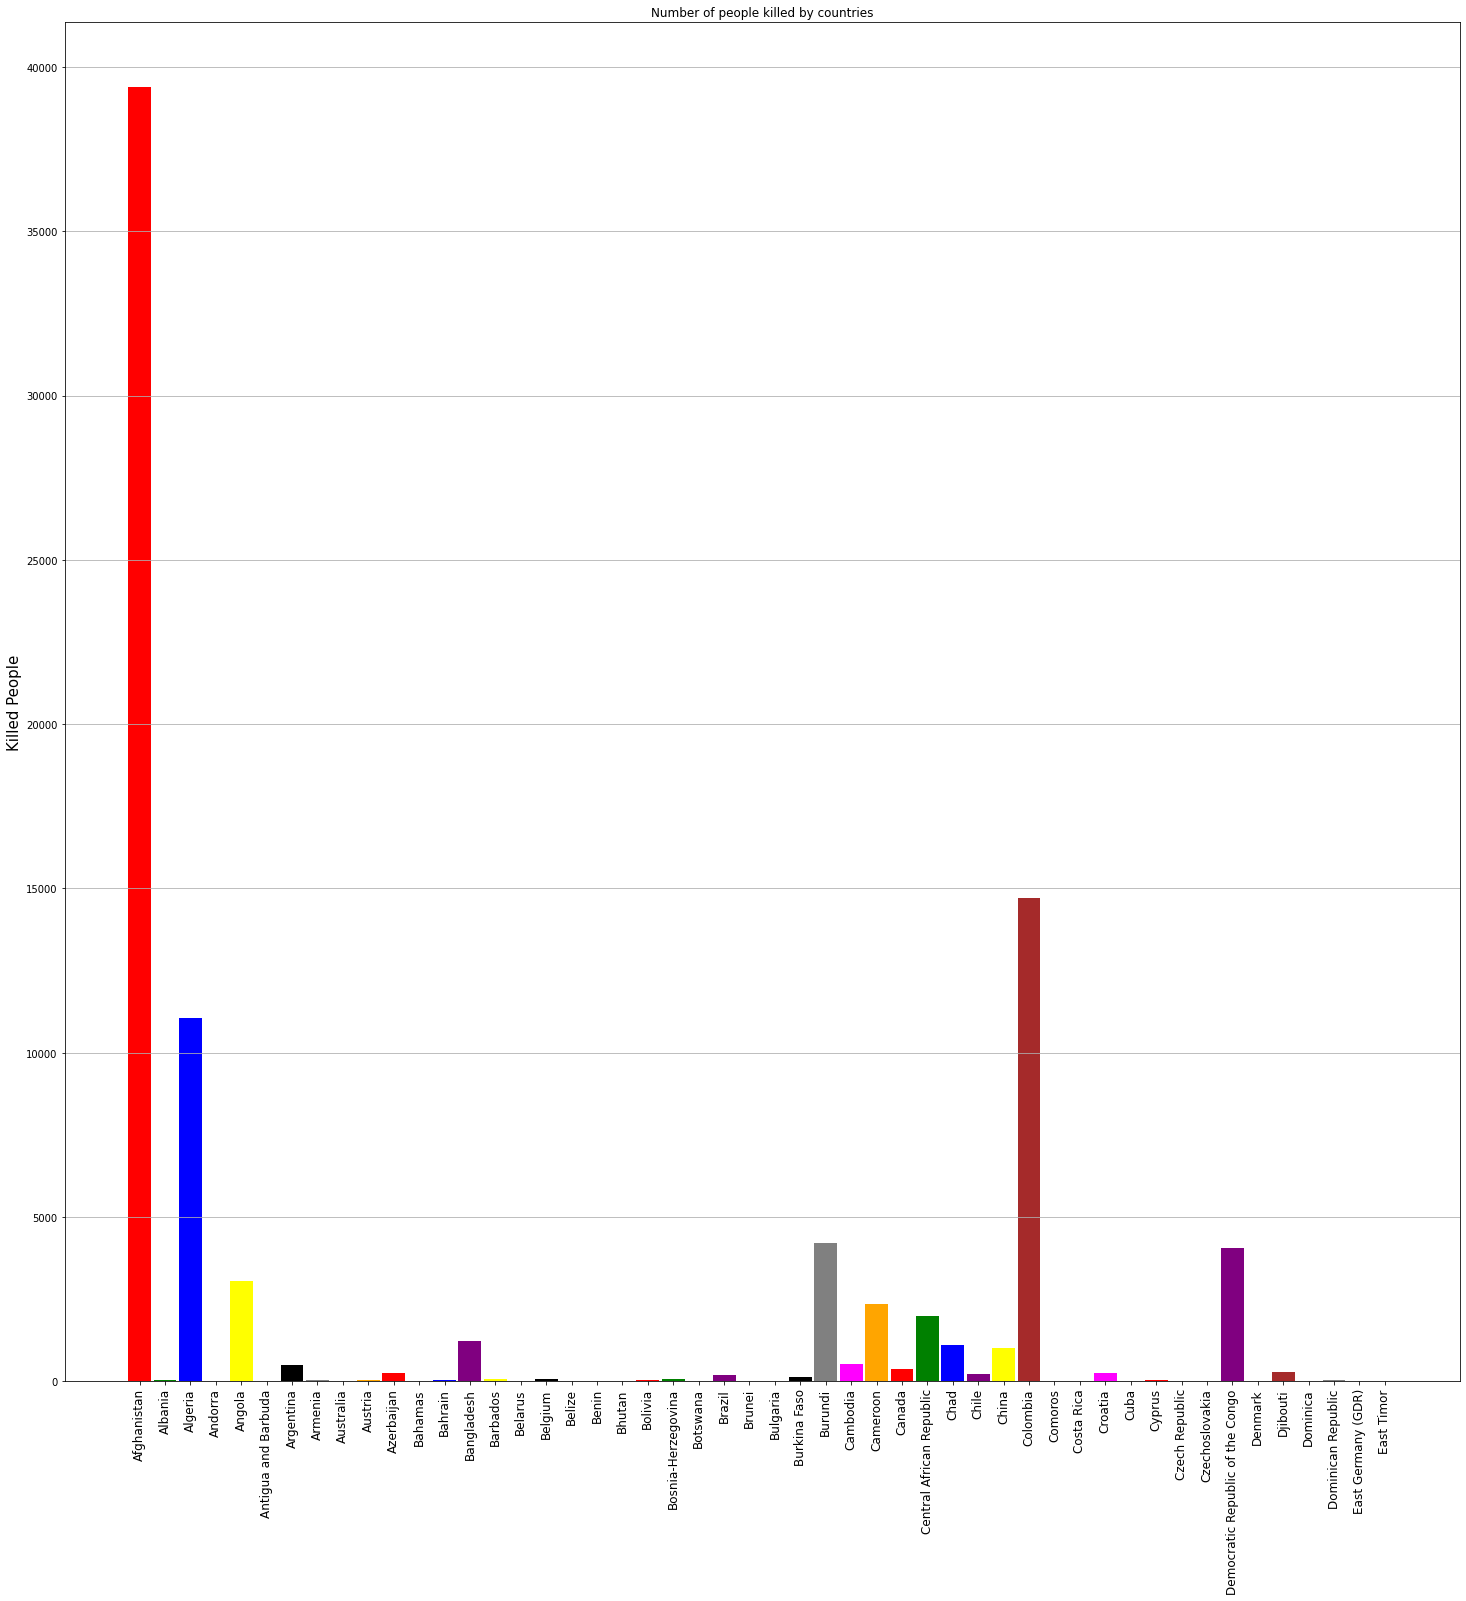

In [30]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
# print(fig_size)
plt.show()

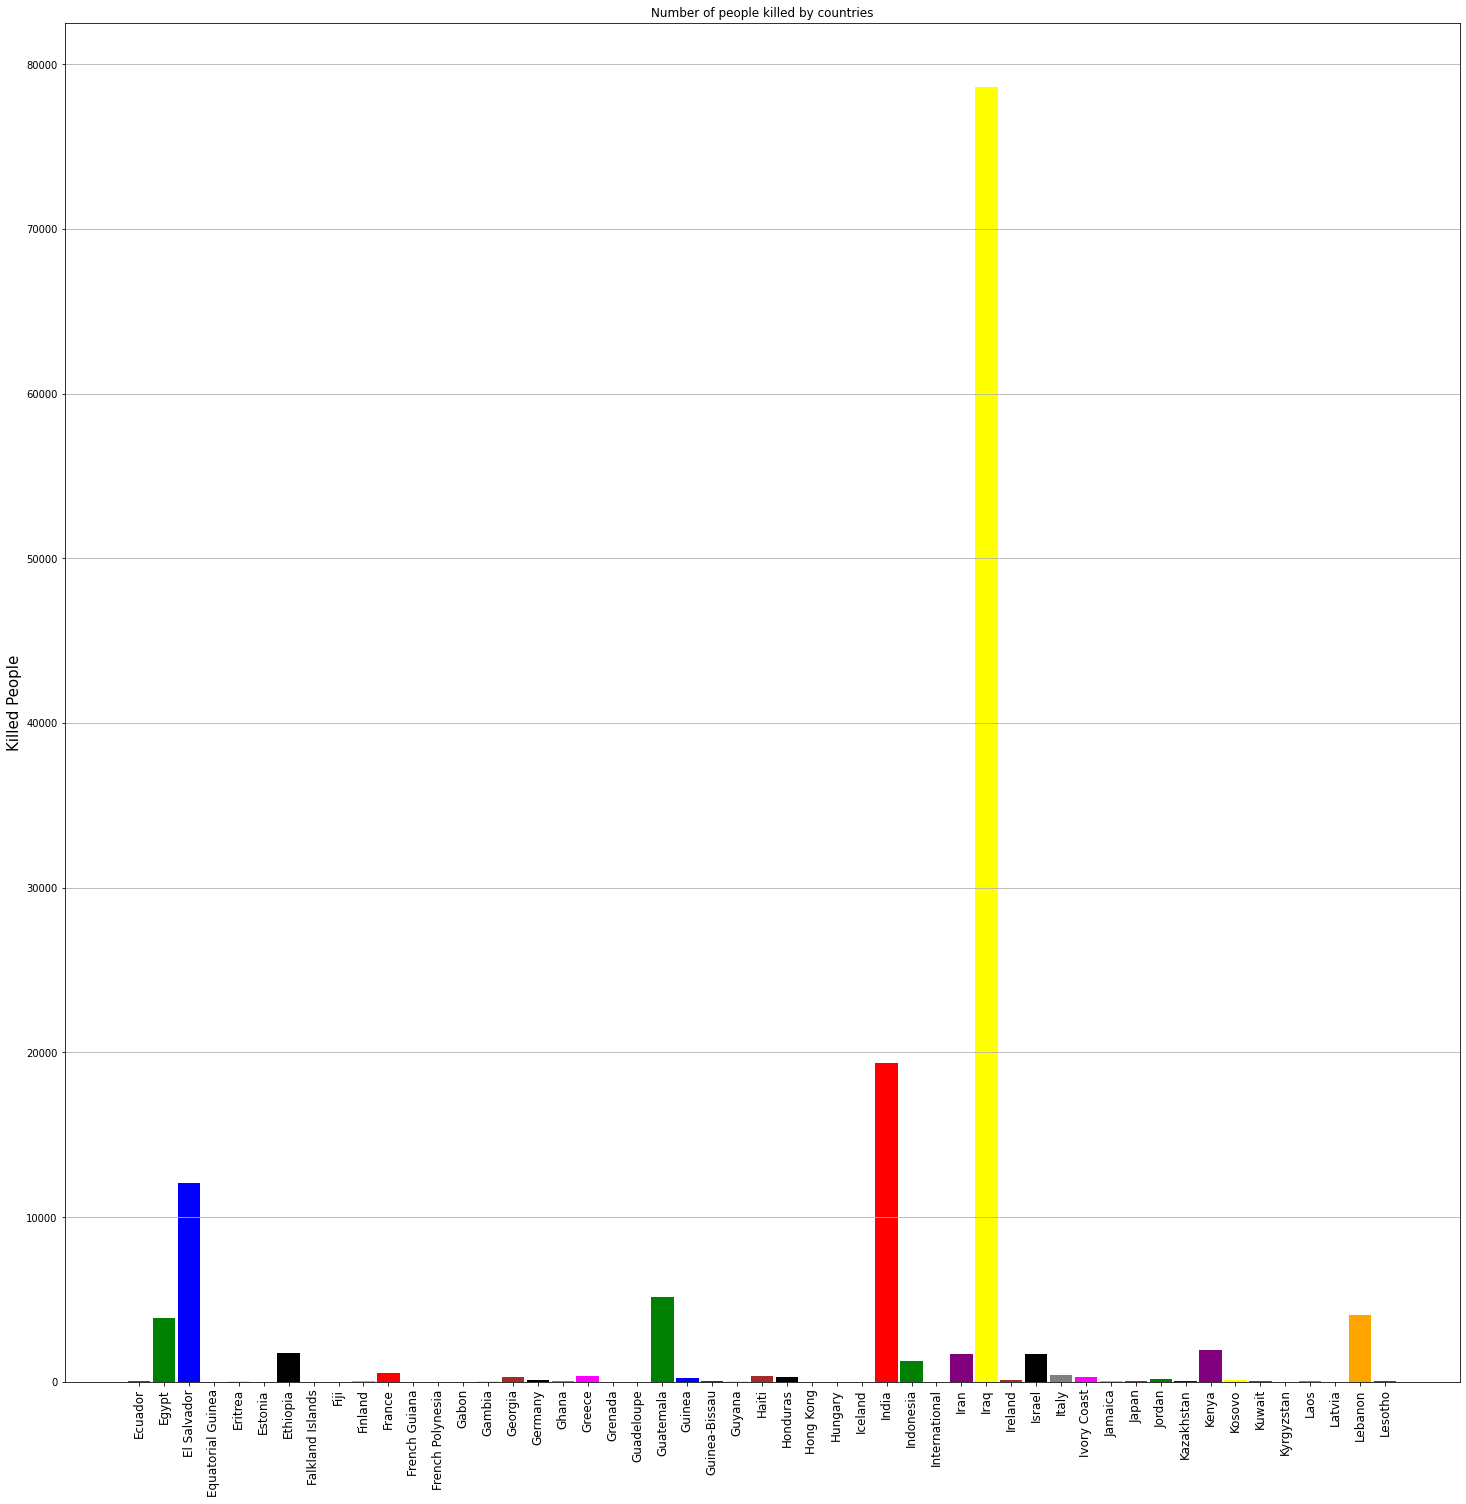

In [31]:
labels = countryKillFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
plt.show()

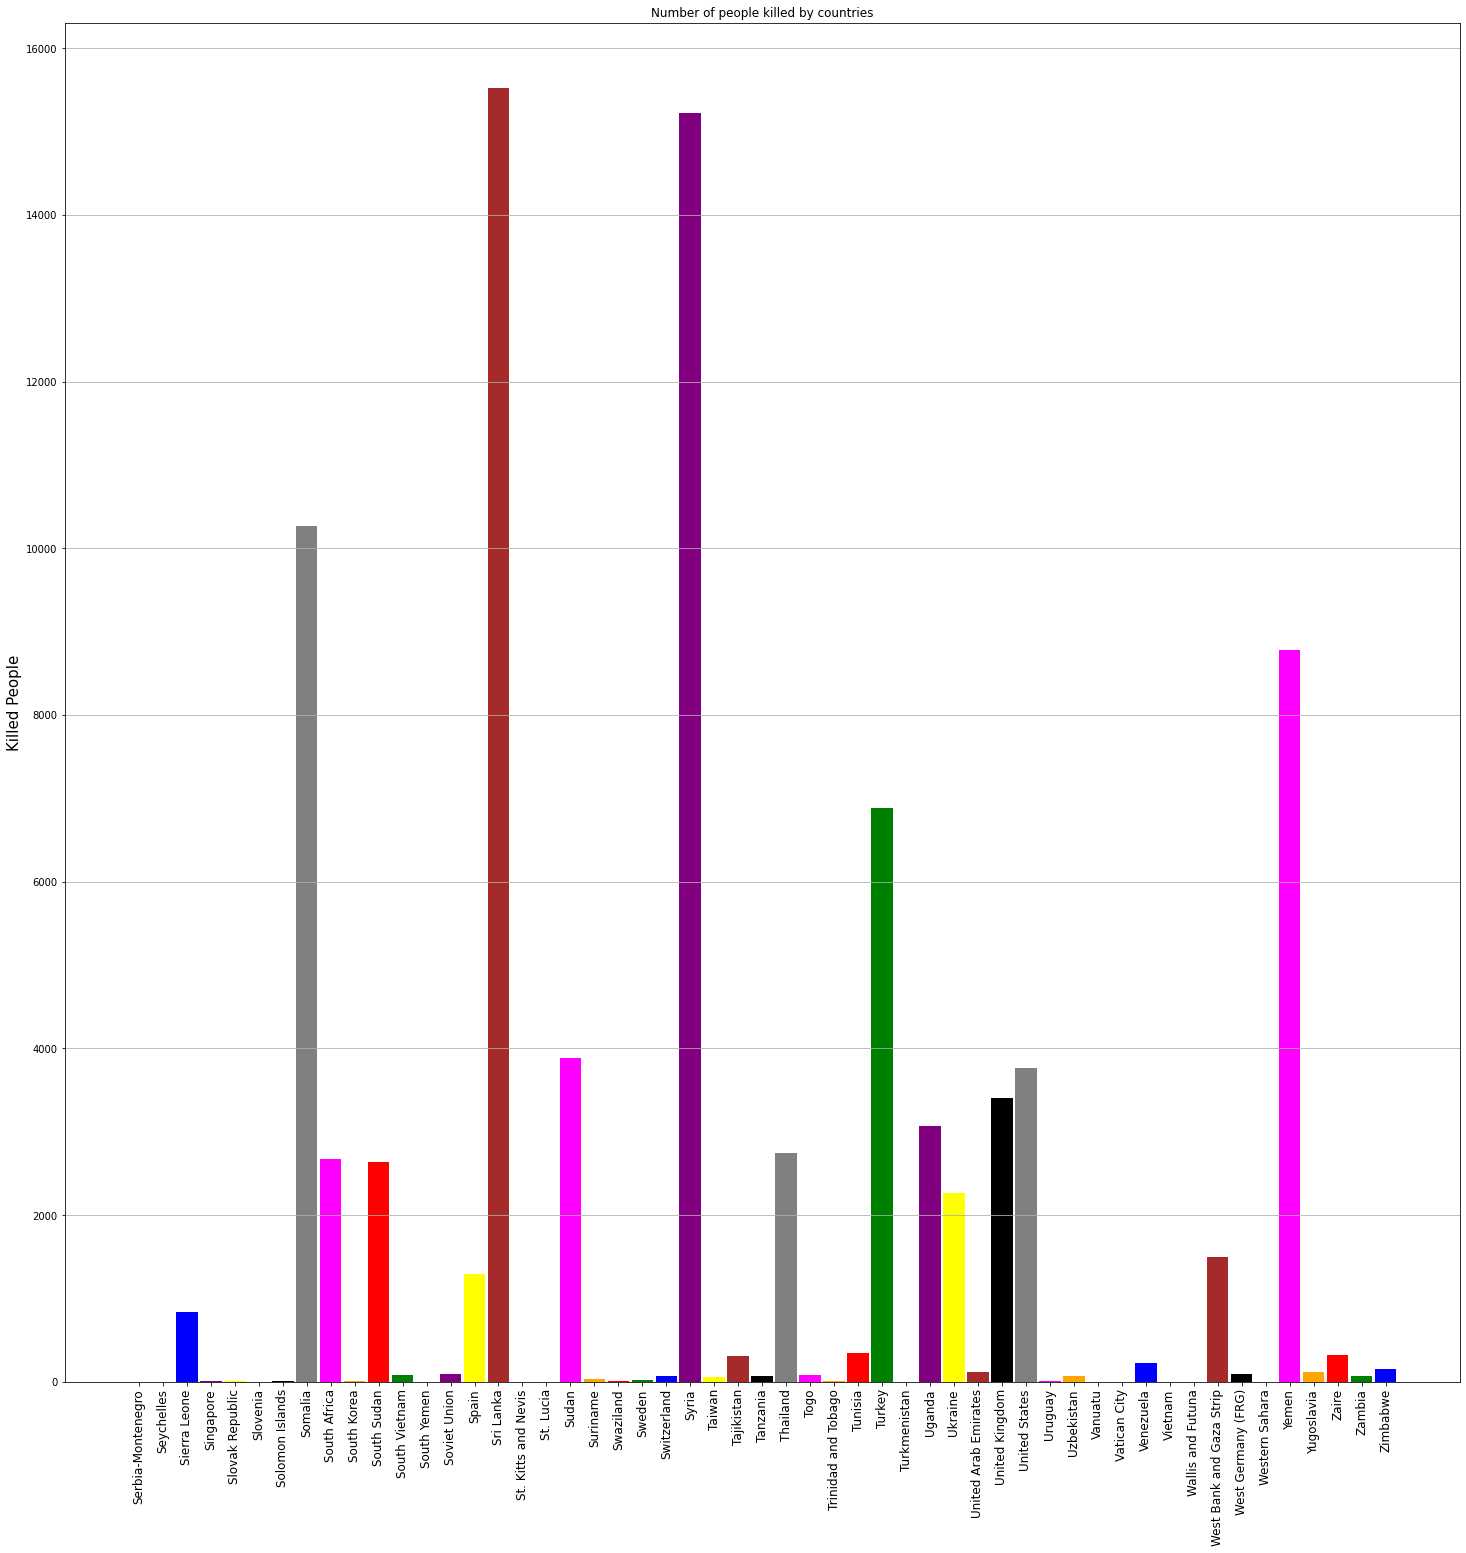

In [32]:
labels = countryKillFormatData.columns.tolist()
labels = labels[152:206]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[152:206]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
plt.show()